## **Customer would be able to maintain an average monthly balance or not**

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Notebooks/churn_prediction_simple.csv")

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
# to check balanced or imbalanced
data["churn"].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [ ]:
X=data.drop(columns=["churn","customer_id"])
Y=data["churn"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
classifier=lr(class_weight="balanced")

In [ ]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_prob=classifier.predict_proba(x_test)

In [ ]:
predicted_prob

array([[0.59172832, 0.40827168],
       [0.46905814, 0.53094186],
       [0.47156997, 0.52843003],
       ...,
       [0.64904767, 0.35095233],
       [0.51303918, 0.48696082],
       [0.40870976, 0.59129024]])

In [ ]:
# accuracy
classifier.score(x_test,y_test)

0.7152242863615768

In [ ]:
# precision score
from sklearn.metrics import precision_score
Precision=precision_score(y_test,predicted_values)
Precision

0.3804780876494024

In [ ]:
# recall score
from sklearn.metrics import recall_score
recall=recall_score(y_test,predicted_values)
recall

0.6387959866220736

In [ ]:
# f1 score
from sklearn.metrics import f1_score
f1=f1_score(y_test,predicted_values)
f1

0.4769038701622972

the above is a bad model as f1 < 0.50


In [ ]:
from sklearn.metrics import precision_recall_fscore_support as summary
precision,Recall,F1,support=summary(y_test,predicted_values)

In [ ]:
precision

array([0.88858322, 0.38047809])

In [ ]:
Recall

array([0.73471709, 0.63879599])

In [ ]:
F1

array([0.80435798, 0.47690387])

In [ ]:
support

array([3517,  897])

In [ ]:
from sklearn.metrics import classification_report
k=classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3517
           1       0.38      0.64      0.48       897

    accuracy                           0.72      4414
   macro avg       0.63      0.69      0.64      4414
weighted avg       0.79      0.72      0.74      4414



In [ ]:
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_prob[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4409,), (4409,), (4408,))

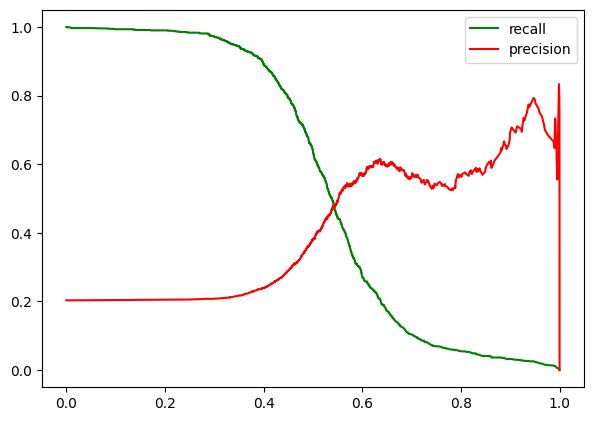

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,recall_points[:-1],color="green",label="recall")
plt.plot(threshold_points,precision_points[:-1],color="red",label="precision")

plt.legend()
plt.show()

# **AUC-ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_prob[:,1])
auc_score=roc_auc_score(y_test,predicted_prob[:,1])

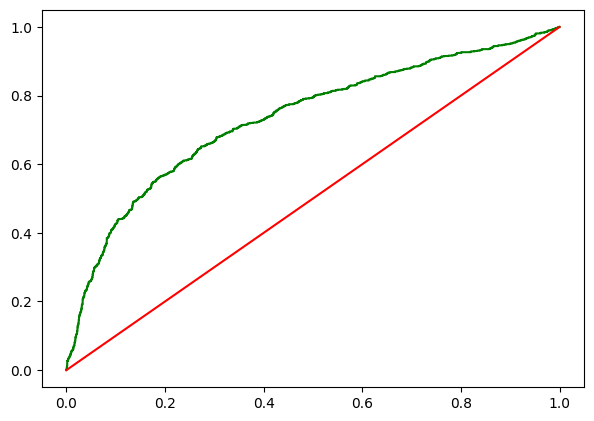

0.733614940523002

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color="green")
plt.plot([1,0],[1,0],label="baseline",color="red")
plt.show()
auc_score

# Coefficient **Plot**

In [ ]:
c=classifier.coef_.reshape(-1)
x=X.columns
c.shape,x.shape

[-1.75767207e-01 -7.71811128e-02 -5.77124437e-02  4.85798259e-02
 -9.19047961e-02 -1.38497803e-03  3.94970508e-02 -2.18434377e-03
 -1.38409503e-01 -1.75995660e+00  1.33940732e-02  1.46694312e+00
 -6.20440919e-02  1.41982745e-01 -4.13145984e-01  7.39272304e-01
  6.55100643e-01  6.93189147e-02  4.74011099e-02]


((19,), (19,))

In [ ]:
coeff_plot=pd.DataFrame({"coefficients": c,
                        "Columns":x})
coeff_plot

,coefficients,Columns
0,-0.175767,vintage
1,-0.077181,age
2,-0.057712,gender
3,0.048580,dependents
4,-0.091905,occupation
5,-0.001385,city
6,0.039497,customer_nw_category
7,-0.002184,branch_code
8,-0.138410,days_since_last_transaction
9,-1.759957,current_balance


In [ ]:
coeff_plot.sort_values(by="coefficients",inplace=True)
coeff_plot.head(10)

,coefficients,Columns
9,-1.759957,current_balance
14,-0.413146,previous_month_credit
0,-0.175767,vintage
8,-0.138410,days_since_last_transaction
4,-0.091905,occupation
1,-0.077181,age
12,-0.062044,average_monthly_balance_prevQ2
2,-0.057712,gender
7,-0.002184,branch_code
5,-0.001385,city


<BarContainer object of 19 artists>

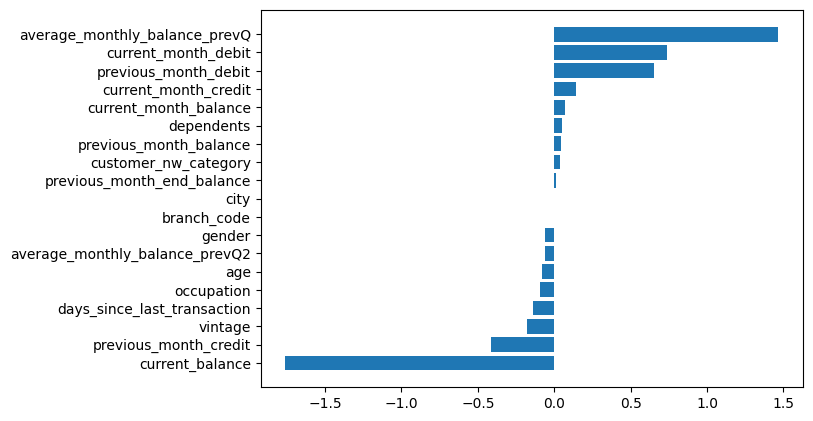

In [ ]:
plt.figure(figsize=(7,5),dpi=100)
plt.barh(coeff_plot["Columns"],coeff_plot["coefficients"])